<a href="https://colab.research.google.com/github/AsadBukhari886/isolation_forest_anomaly_detection/blob/main/Isolation_Forest_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


In [70]:
# Synthetic data
np.random.seed(42)

# Normal sensor readings
temperature = np.random.normal(25, 2, 200)  # mean=25, std=2
humidity = np.random.normal(50, 5, 200)     # mean=50, std=5

# Introduce anomalies
temperature[::20] = temperature[::20] + 10   # spike every 20th reading
humidity[::25] = humidity[::25] - 15         # drop every 25th reading
# print("temperature--->", temperature)
# print("humidity--->", humidity)

# Combine into a dataframe
data = pd.DataFrame({
    'temperature': temperature,
    'humidity': humidity
})

data.head()


,temperature,humidity
0,38.248691,32.995609
1,23.776487,54.120028
2,23.943656,47.188473
3,22.854063,59.774390
4,26.730815,43.340242


# Isolation Forest

In [71]:
# Initialize Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(data)

# Predict anomalies (-1 = anomaly, 1 = normal)
data['anomaly'] = model.predict(data)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly

data.head(10)



,temperature,humidity,anomaly
0,38.248691,32.995609,1
1,23.776487,54.120028,0
2,23.943656,47.188473,0
3,22.854063,59.774390,1
4,26.730815,43.340242,0
5,20.396923,41.196557,1
6,28.489624,41.746394,0
7,23.477586,45.547222,0
8,25.638078,44.404423,0
9,24.501259,59.780395,0


# Anomaly detection


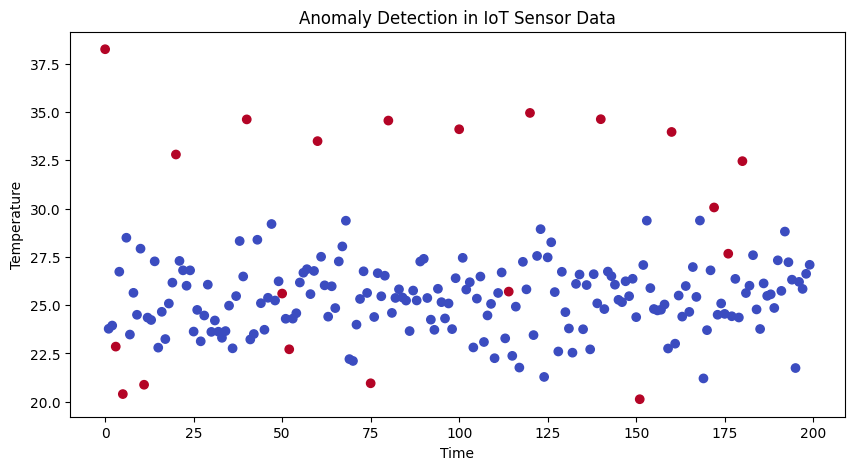

In [72]:
# Plot anomalies
plt.figure(figsize=(10,5))
plt.scatter(data.index, data['temperature'], c=data['anomaly'], cmap='coolwarm', label='Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Anomaly Detection in IoT Sensor Data')
plt.show()
